In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from context import (
    experiment,
    plots,
    PlotData
)

# data is currently outside of the repository
data_dir = 'D:/test_data_experiment/'

# load experiment from 
exp = experiment.FixedCourtshipTrackingExperiment.load_from_fcts(
    data_dirs=[data_dir + 'fcts2'],
    groups={'control': ['control'], 'experimental': ['experimental']},
    order=['control','experimental']
)
exp.add_behavior_from_csv('courtship_gt', data_dir + 'hand-scored-courtship.csv')

behaviors = ['tapping', 'scissoring', 'orienting']
clean_behaviors = [exp.clean_behavior(bname, 'courtship_gt') for bname in behaviors]
hierarchized_behaviors = {behaviors[i]: hname for i, hname in enumerate(exp.hierarchize_behaviors(clean_behaviors))}

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x13013ef0>)

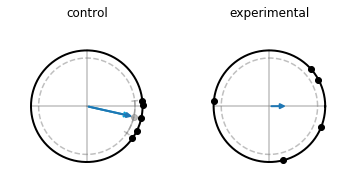

In [19]:
data = exp.get_ang_location_summary(hierarchized_behaviors['scissoring'])
fig, ax = plots.polar_dot_binned(
    data,
    order=exp.order,
)

plots.polar_arrow({'control': data['control']}, ax=ax[0])
plots.polar_arrow({'experimental': data['experimental']}, ax=ax[1])

Requirements for confidence levels not met:
                CI limits require a certain concentration of the data around the mean


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x19ac3518>)

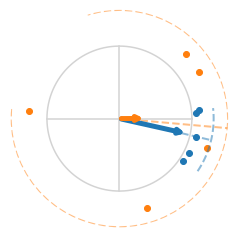

In [33]:
plots.polar_dot_jittered(exp, hierarchized_behaviors['scissoring'])